<h1 style="color:blue"> Praktikum 6.</h1>
<h3 style="color:blue">JSON andmeformaat, märgendatud tekstide salvestamine ja taastamine, <br> ajaväljendite tuvastamine ja visualiseerimine</h3>

Käesolevas praktikumis tutvume JSON andmeformaadiga ja vaatame, kuidas selles formaadis andmeid (sh EstNLTK märgendustega tekste) salvestada/taastada, keeletöötluse poolel aga tegeleme ajaväljendite tuvastamisega ning joonistame ajaväljenditele vastavate kuupäevade kohta tulpdiagramme.

## JSON andmeformaat

Neljandas praktikumis tutvusime CSV andmeformaadiga. CSV sobib hästi tabelkujul andmete salvestamiseks, aga pole just kuigi mugav kasutada, kui meie andmed on hierarhilise struktuuriga. 

Näiteks, milline tabel tuleks teha, kui eesmärk oleks salvestada tabelisse EstNLTK `Text` ning selle märgenduskihid: laused, sõnad, sõnade morfoloogilised analüüsid ja tekstist tuvastatud nimeüksuste fraasid?
Selleks, et kogu see informatsioon ilma kadudeta tabelisse salvestada, tuleks luua võrdlemisi keerukas andmete teisendamise süsteem ja võimalik, et ei piisakski ühest tabelist, vaid tuleks teha mitu. Märksa parem oleks aga, kui saaksime keeruka süsteemi loomise asemel lihtsalt kasutada sõnastik-andmestruktuuri. Ja seda võimaldabki JSON.

JSON sai algselt populaarseks veebis andmete vahetamise formaadina, hiljem aga muutus tavaliseks ka andmete lokaalsel talletamisel. Tänu tekstilisele vormingule on JSON hõlpsalt loetav ja kirjutatav nii arvutite kui ka inimeste poolt. Nii nagu CSV, nii on ka JSON formaat täielikult platvormist sõltumatu, seega võib andmed kirjutada näiteks Windows-is ja hiljem lugeda Linux-is.

JSON-is esitatakse andmed objektidena, mis pannakse kokku kaht liiki struktuuridest:

 * _Võti-väärtus_ paarid, kus võti on alati sõne ja väärtus võib olla sõne, arv, tõeväärtus (`true/false`), järjend või mõni JSON objekt. Süntaksi poolest on see väga sarnane Pythoni sõnastikule. Näide:
 
       {
         "nimi": "Juku",
         "vanus": 15
       }

 * _Järjendid_ , mille elementideks võivad olla sõned, arvud, tõeväärtused või JSON objektid. Jällegi, süntaksilt sarnane Pythoni listile. Näide: 
 
       {
         "nimi": "Juku",
         "vanus": 15,
         "vanemad" : [
             {  
               "nimi": "Juhan",
               "vanus": 40
             },
             {  
               "nimi": "Pille",
               "vanus": 37
             }
         ]
       }
       
   Eelmises näites: võtmele `"vanemad"` vastavaks väärtuseks on järjend (`[]`-vahel), mis koosneb omakorda JSON objektidest.

Neid kaht liiki struktuuriliiki kombineerides võib moodustada kuitahes keerukaid või sügavaid andmestruktuure, mingit otsest piirangut siin ei ole (v.a loomulikud piirangud, mis tulenevad arvuti mälu- / kõvakettamahust).

Muide, ka Jupyter Notebook-i `.ipynb` failid on JSON formaadis, seega saad neid avada ka täiesti tavalise tekstiredaktoriga ning vajadusel teha kiireid parandusi ilma, et peaksid Notebook-i käivitama. **(!)** Siiski ka hoiatus: kui muudad `.ipynb` faili käsitsi, pead olema väga tähelepanelik selle suhtes, et säiliks algne faili formaat -- kui teed formaadi katki, ei ole märkmikufaili enam võimalik Notebook-is käivitada ...

### Python ja JSON

Praktiliselt iga Pythoni sõnastiku, mille võtmeteks on sõned ning väärtused on sõned, arvud, tõeväärtused, järjendid või sõnastikud, võib teisendada JSON kujule. Seda saab teha teegi [`json`](https://docs.python.org/3.8/library/json.html) abil:

In [1]:
import json

my_hierarchical_data = {'nimi':'Elvis','lemmikloomad':[{'nimi':'Pontu','liik':'koer'},{'nimi':'Jõnksu','liik':'küülik'}]}

# Teisendame sõnastiku JSON kujul sõneks
json_string = json.dumps( my_hierarchical_data )

print(json_string)

{"nimi": "Elvis", "lemmikloomad": [{"nimi": "Pontu", "liik": "koer"}, {"nimi": "J\u00f5nksu", "liik": "k\u00fc\u00fclik"}]}


Mis muutus pärast JSON-iks konverteerimist? Esiteks, kõik sõned on nüüd `"`-sümbolite, mitte enam `'`-sümbolite vahel. Erinevalt Pythonist lubataksegi JSON-is ainult jutumärkide vahel olevaid sõnesid. Teiseks, täpitähtede asemele ilmusid sõnedesse veidrad sümbolite jadad. Põhjus selles, et vaikimisi lubab meetod `dumps` sõnede sees kasutada ainult [ASCII sümboleid](https://www.rapidtables.com/code/text/ascii-table.html) ning kõik muud sümbolid kodeeritakse. Seda sätet saab siiski ka muuta -- kui käivitad meetodi lipuga `ensure_ascii=False`, siis jäävad _Unicode_ sümbolid alles nende algsel kujul.

Andmete tagasiteisendamiseks sõne kujult Pythoni andmestruktuuriks saame kasutada meetodit `json.loads`:

In [2]:
# Teisendame JSON kujul andmed tagasi Pythoni sõnastikuks
my_new_hierarchical_data = json.loads(json_string)

print(my_new_hierarchical_data)

{'nimi': 'Elvis', 'lemmikloomad': [{'nimi': 'Pontu', 'liik': 'koer'}, {'nimi': 'Jõnksu', 'liik': 'küülik'}]}


#### JSON andmete "kaunistrükk"

Hierarhilist struktuuri võib olla keerukas jälgida, kui kogu andmestruktuur on surutud kokku ühele reale. Et andmete struktuur oleks kergemini jälgitav, selleks trükitakse andmed sageli välja nii, et iga element on eraldi real ning hierarhia järgmise taseme liikmed on eelmise taseme liikmetest eristatud taanete abil. Ka JSON sõnede loomisel võib nõuda, et erinevate tasemete liikmed oleksid eristatud taanete abil:

In [3]:
# Teisendame sõnastiku JSON kujul sõneks ning nõuame, et taane oleks 3 tühikut
json_string = json.dumps( my_hierarchical_data, indent = 3 )

print(json_string)

{
   "nimi": "Elvis",
   "lemmikloomad": [
      {
         "nimi": "Pontu",
         "liik": "koer"
      },
      {
         "nimi": "J\u00f5nksu",
         "liik": "k\u00fc\u00fclik"
      }
   ]
}


Andmete sisselugemise seisukohalt vahet pole, kas andmed on taandega või ilma -- meetod `loads` oskab lugeda mõlemal kujul andmeid. Küll aga on taandega JSON-andmete miinuseks see, et need võtavad (mälus / kõvakettal) rohkem ruumi ja seega praktikas (andmete vahetamisel / salvestamisel) kasutatakse taanetega kuju harvem.

Ka Pythoni enda andmestruktuure võib väljastada ekraanile taanetega. Selle jaoks on standardteegis nn "kaunistrüki" ( ingl _pretty-printing_ ) meetod [`pprint`](https://docs.python.org/3.8/library/pprint.html):

In [4]:
from pprint import pprint

pprint(my_hierarchical_data)

{'lemmikloomad': [{'liik': 'koer', 'nimi': 'Pontu'},
                  {'liik': 'küülik', 'nimi': 'Jõnksu'}],
 'nimi': 'Elvis'}


#### JSON andmete salvestamine faili / lugemine failist

Kui andmed on konverteeritud JSON sõneks, siis võib need salvestada faili samal viisil, nagu salvestatakse tavalisi tekstiandmeid. Analoogselt: JSON failist võib andmed algul lugeda sisse sõnena ning seejärel teisendada `json.loads` abil Pythoni andmeteks. Lisaks sellele on teegis `json` meetodid [`dump`](https://docs.python.org/3.6/library/json.html#json.dump) ja [`load`](https://docs.python.org/3.6/library/json.html#json.load), mida saab kasutada vahetult faili kirjutamiseks / failist lugemiseks. Näide: faili kirjutamine:

In [5]:
with open('minu_andmed.json', 'w') as f:
    # Teisendame andmed JSON kujule ja kirjutame faili
    json.dump( my_hierarchical_data, f )

Mis puutub aga EstNLTK `Text` objektidesse, siis nende salvestamiseks kõvakettale on samuti JSON kõige loomulikum kuju, ning EstNLTK sisaldab ka funktsioone, mis teevad failioperatsioonid veelgi mugavamaks. Järgmisena uurimegi neid.

### Estnltk ja JSON

EstNLTK andmeformaatide teisendamise funktsioonid leiab moodulist `estnltk.converters`. JSON kujul andmete teisendamiseks on kaks funktsiooni: `json_to_text` ja `text_to_json`:


   - `text_to_json(text)` -- teisendab `Text` objekti JSON kujule ja tagastab sõnena.
   
   
   - `text_to_json(text, file=out_file)` -- teisendab `Text` objekti JSON kujule ja salvestab faili `out_file`.
   
   
   - `json_to_text(json_text=json_text)` -- loeb JSON sõnest (`json_text`) sisse `Text` objekti ning tagastab selle.
   
   
   - `json_to_text(file=json_file)` -- loeb failist `json_file` sisse `Text` objekti ja tagastab selle.

Näide `Text` objekti teisendamisest JSON kujule:

In [6]:
from estnltk import Text
from estnltk.converters import text_to_json

text1 = Text('Minu pere ja muud loomad').tag_layer(['tokens'])
json_str = text_to_json(text1)
json_str

'{"text": "Minu pere ja muud loomad", "meta": {}, "layers": [{"name": "tokens", "attributes": [], "secondary_attributes": [], "parent": null, "enveloping": null, "ambiguous": false, "serialisation_module": null, "meta": {}, "spans": [{"base_span": [0, 4], "annotations": [{}]}, {"base_span": [5, 9], "annotations": [{}]}, {"base_span": [10, 12], "annotations": [{}]}, {"base_span": [13, 17], "annotations": [{}]}, {"base_span": [18, 24], "annotations": [{}]}]}]}'

Nagu näha, on konverteerimise tulemuseks sõne, mis annab `Text` objekti edasi sõnastiku kujul. Sõnastiku struktuuri nüanssidesse me siinkohal süüvima ei pea, oluline on teadmine, et sellisel kujul võib andmed kirjutada failidesse ning pärast saab `json_to_text` abil jälle taastada algse `Text` objekti:

In [7]:
# Taastame Text objekti sõnest
from estnltk.converters import json_to_text
text2 = json_to_text(json_text = json_str)
text2

Text(text='Minu pere ja muud loomad')

Rohkem informatsiooni ning kasutusnäiteid teisendamisfunktsioonide kohta leiad [sellest juhendmaterjalist](https://github.com/estnltk/estnltk/blob/main/tutorials/converters/json_exporter_importer.ipynb).

<div class="alert alert-block alert-warning">
 <h4><i>Tehniline lisajutt 1: Milline info läheb kaasa <code>Text</code> objekti JSON-iks teisendamisel?</i></h4>
 <br>
Teisendatud sõnes on algne tekst, selle metaandmed ning ka kõik tekstile lisatud kihid. 
Mis jääb välja? Kui kihtide loomisel on kasutatud märgendajaid mingite spetsiifiliste parameetritega, siis info kasutatud märgendajate ja nende parameetrite kohta ei säili. Nt, kui morfoloogilisel analüüsil on lipud <code>disambiguate</code>, <code>propername</code> ja <code>guess</code> välja lülitatud, siis seda infot otseselt ei salvestata (kaudselt avaldub see aga tekitatud morf analüüsi kihi kvaliteedis).
</div>

<div class="alert alert-block alert-warning">
 <h4><i>Tehniline lisajutt 2: <code>Text</code> objektid &lt;-&gt; sõnastikud</i></h4>
 <br>
JSON ja sõnastikud käivad käsikäes ning seega toimub funktsioonide <code>text_to_json</code> ja <code>json_to_text</code>  rakendamisel (taustal) ka <code>Text</code> objekti teisendamine sõnastikuks / taastamine sõnastiku kujult. Kui mingil põhjusel on vaja sõnastiku-teisendusi eraldi teha, siis selle jaoks on <code>estnltk.converters</code> all funktsioonid <code>text_to_dict</code> ja <code>dict_to_text</code>. Veelgi detailsemaks minnes: ka üksikuid märgenduskihte on võimalik  eraldiseisvalt sõnastikuks salvestada ja sõnastiku kujult taastada funktsioonide <code>layer_to_dict</code> ja <code>dict_to_layer</code> abil. See on abiks siis, kui tahame lisada korpuse <code>Text</code> objektidele väga suurt hulka kihte: sellisel juhul tasub kihte <code>Text</code> objektidest eraldiseisvalt hoida (kas siis failides või andmebaasis) ning <code>Text</code>-ide taastamisel lugeda kihte sisse valikuliselt, vastavalt vajadusele. Rohkem informatsiooni sõnastikuks konverteerimise kohta leiab siit: <a href="https://github.com/estnltk/estnltk/blob/main/tutorials/converters/dict_exporter_importer.ipynb"> https://github.com/estnltk/estnltk/blob/main/tutorials/converters/dict_exporter_importer.ipynb </a>
</div>

### Ülesanne 1. JSON korpuse lugemine ja kirjutamine (1 p)

Looge skript, mis teeb järgmist: 
   1. loeb kaustast 'aja_json' ajaleheartiklid Postimehest ja EPL-ist (igas failis on üks JSON kujul `Text` objekt); 
   2. lisab sisseloetud tekstidele morfoloogilised analüüsid;
   3. teeb tekstide metaandmete põhjal kindlaks nende ilmumiskuupäevad ja jätab meelde, mitu teksti mingil päeval ilmus;
   4. salvestab artiklid uude faili selliselt, et iga artikkel paikneb JSON kujul uuel failireal;

Programm väljastab töö lõpus, mitu teksti / artiklit iga ilmumiskuupäeva kohta korpus sisaldab.

Detailid / vihjed: 

   - artikli-failide sisselugemiseks kasutage moodulis `estnltk.converters` olevat funktsiooni `json_to_text`;
   - morfoloogilise analüüsi lisamine: uuri, millised märgendused on sisseloetud tekstidel juba olemas -- kas kõik morfoloogilise analüüsi jaoks vajalikud kihid on olemas või tuleb mõni kiht juurde lisada? Kas mõni kiht on ka "ülearu"?
   - _metaandmed_ ja ilmumiskuupäevad: 
     - igal EstNLTK `Text` objektil on atribuut `meta`, mis sisaldab teksti metaandmeid sõnastiku kujul. Uuri, millised võtmed/väärtused on failist sisseloetud `Text` objektil `meta` all (vihje: kasuta meetodit `.keys()` sõnastiku võtmete kättesaamiseks);
     - ilmumiskuupäevad: üks metaandmete väli sisaldab informatsiooni ka ilmumiskuupäeva kohta. Kasuta regulaaravaldisi, et ilmumiskuupäev kätte saada;
   - salvestamine JSON kujul: 
     - funktsiooni `text_to_json` abil saab teisendada `Text` objekti JSON sõneks;
     - on oluline, et faili kirjutamisel lisatakse JSON sõne lõppu ka realõpusümbol (`\n`) -- kui see jääb tegemata, muutuvad JSON objektid üksteisest eristamatuks ja `Text` objekti taastamine järgmises ülesandes ei õnnestu;

### Boonusülesanne. Programmi tööaja mõõtmine (0,5 p)

Kui on tarvis analüüsida suurt korpust, otsida/loendada midagi märgenduse järgi, siis võib märgenduste faili salvestamise taga olla praktiline vajadus: kogu märgendustega korpus ei pruugi lihtsalt korraga mällu ära mahtuda. Lisaks pakub märgenduste faili salvestamine ka ajavõitu: juba märgendatud `Text` objektide failist lugemine ülesande lahendamiseks on enamasti oluliselt kiirem kui märgenduse nö nullist lisamine. Järgnevalt ongi ülesandeks uurida, kui suurt ajavõitu pakub juba märgendatud korpuse kasutamine.

Lahenda lihtne ülesanne -- loenda, kui palju on Postimehe ja EPL korpuses (kaustas 'aja_json') nimeüksuseid -- kahel viisil:
  1. failidest loetakse sisse tavalised tekstid, lisatakse nimeüksuste märgendus (isikud, asukohad, organisatsioonid) ning seejärel loetakse nimeüksused kokku;
  2. failidest loetakse sisse juba nimeüksuste märgendust sisaldavad tekstid (tekitage need ise) ning loetakse nimeüksused kokku;
  
Mõõda, kui palju kulub programmil aega esimesel ja teisel viisil ülesande lahendamiseks.

Programmi tööaja mõõtmiseks Pythonis on mitmeid viise. Uuri moodulite `timeit` ([viide 1](https://docs.python.org/3.8/library/timeit.html), [viide 2](http://pythoncentral.io/measure-time-in-python-time-time-vs-time-clock/)) ja `datetime/timedelta` ([viide 1](https://stackoverflow.com/a/766382), [viide 2](http://en.proft.me/2014/12/7/measure-time-python)) võimalusi ning leia antud ülesande jaoks sobivaim tööaja mõõtmise viis.

## Ajaväljendite tuvastamine

Loomuliku keele tekstides kasutatakse sageli aja väljendamiseks kalendrilisi termineid ja määranguid (nt '1. oktoobril', 'järgmisel neljapäeval', 'eelmisel kuul') ning sellistel juhtudel saab ajaväljendeid ( ingl _time expression_ ehk _TIMEX_ ) ja nende semantikat ka suures osas automaatselt analüüsida. Ajaväljendite tuvastaja tegelebki tekstist ajaväljendite otsimisega (ajaväljendifraaside piiritlemisega) ning nende semantika _normaliseerimisega_ .

Ajaväljendite _semantika normaliseerimine_ tähendab seda, et kõigi ajaväljendite semantika esitatakse ühtsel viisil. Näiteks, kuupäeva '7. oktoober 2022' edasiandmiseks võib kasutada ajaväljendeid '7. okt 2022' ,  '2022.10.07' või siis (sõltuvalt kõnehetkest / kirjutamise ajast) 'täna', 'reedel', 'selle nädala reedel' -- tuvastaja eesmärgiks on aga kõigile neile vastavusse seada üks ajamäärang: `2022-10-07`. 

Tuvastaja poolt kasutatav aja esitamise formaat (`yyyy-mm-dd`) tugineb ISO standardile, ajaväljendite normaliseerimise tarbeks on seda aga natukene kohendatud. Näiteks, kui ajaväljendist pole võimalik välja lugeda konkreetset kuupäeva, aga seal on infot (või saab oletada midagi) _kuu_ ja _aasta_ kohta, siis lühendatakse esituskuju paremalt poolt: 'oktoober 2022' , 'sellel kuul' , 'tänavu oktoobris' => `2022-10`. 

Analoogselt saab kuupäeva esituskuju pikendada, kui väljendis on infot ka kellaaja kohta (nt  '7. oktoobril kell 10.00' => `2022-10-07T10:00`). Lisaks võimaldab aja esitamise formaat edasi anda kestvuste (nt 'viis aastat') ja korduvuste ('kord nädalas') semantikat ning teatud määral ka hägusate ajaväljendite (nagu nt 'hiljuti', 'järgmisel suvel') semantikat, aga käesolevas praktikumis me kõiki neid nüansse uurida ei jõua. Märgendusformaadi detailsema kirjelduse leiab EstNLTK [dokumentatsioonist](https://github.com/estnltk/estnltk/blob/main/tutorials/nlp_pipeline/D_information_extraction/03_time_expressions.ipynb).

**Tehniline vahemärkus**: ajaväljendite tuvastaja kasutab `java`-t. Seega, tuvastaja töölesaamiseks tuleb:

  * Installida süsteemi [_Java SE Runtime Environment_](https://www.java.com/en/download/) (versioon >= 1.8);
  
  * Panna `java` käsk süsteemi keskkonnamuutujasse PATH. Windows-i ja Mac-i puhul tehakse seda tüüpiliselt juba installi käigus, aga kui on siiski tarvis seda käsitsi teha, siis detailsemat abi saab [siit](https://java.com/en/download/help/path.xml);

Kuidas kontrollida, kas `java` on juba olemas või kas installimine õnnestus? Käsureakäsk `java -version` peaks kuvama infot installitud `java` versiooni kohta, näiteks midagi taolist:

    java version "1.8.0_171"
    Java(TM) SE Runtime Environment (build 1.8.0_171-b11)
    Java HotSpot(TM) 64-Bit Server VM (build 25.171-b11, mixed mode)

  * _Lisamärkus_ : Kui käivitad EstNLTK-s esmakordselt `java`-t kasutava analüüsi -- ajaväljendite või osalausete tuvastamise -- läheb alguses natukene kauem aega, kuna toimub `java` protsessi initsialiseerimine. Kui see on tehtud, peaks aga järgmiste analüüside tegemine kulgema ilma oluliste viivitusteta.

EstNLTK ajaväljendite tuvastajat on kõige mugavam välja kutsuda `tag_layer`-i meetodi abil:

In [8]:
from estnltk import Text
text = Text('Potsataja ütles eile, et vaatavad nüüd Genaga viie aasta plaanid uuesti üle.')

# Lisame tekstile ajaväljendite märgenduskihi ('timexes')
text.tag_layer('timexes')

# Kuvame leitud ajaväljendid
text['timexes']

Layer(name='timexes', attributes=('tid', 'type', 'value', 'temporal_function', 'anchor_time_id', 'mod', 'quant', 'freq', 'begin_point', 'end_point', 'part_of_interval'), spans=SL[Span('eile', [{'tid': 't1', 'type': 'DATE', 'value': '2022-10-05', 'temporal_function': True, 'anchor_time_id': 't0', 'mod': None, 'quant': None, 'freq': None, 'begin_point': None, 'end_point': None, 'part_of_interval': None}]),
Span('nüüd', [{'tid': 't2', 'type': 'DATE', 'value': 'PRESENT_REF', 'temporal_function': True, 'anchor_time_id': 't0', 'mod': None, 'quant': None, 'freq': None, 'begin_point': None, 'end_point': None, 'part_of_interval': None}]),
Span('viie aasta', [{'tid': 't3', 'type': 'DURATION', 'value': 'P5Y', 'temporal_function': False, 'anchor_time_id': None, 'mod': None, 'quant': None, 'freq': None, 'begin_point': None, 'end_point': None, 'part_of_interval': None}])])

Nagu näha, sisaldab ajaväljendite märgenduskiht üksjagu palju atribuute, nende kõigi kohta saad huvi korral lähemalt lugeda [siit](https://github.com/estnltk/estnltk/blob/main/tutorials/nlp_pipeline/D_information_extraction/03_time_expressions.ipynb). Käesoleva praktikumi seisukohalt on aga kõige olulisem info atribuutides `text`, `type` ja `value`. Seega võime teha märgendustest väljavõtte, mis sisaldab vaid neid atribuute:

In [9]:
text['timexes'][['text','type','value']]

,text,type,value
0,eile,DATE,2022-10-05
1,nüüd,DATE,PRESENT_REF
2,viie aasta,DURATION,P5Y


Atribuudi `type` all on ajaväljendi liik: `DATE` -- tavaline toimumisaeg, `TIME` -- kellaaeg-täpsusega toimumisaeg, `DURATION` -- kestvus või `SET` -- korduvus. Võtme `value` all on ajaväljendi normaliseeritud semantika.

Näide: andmete väljavõtmine `AttributeTupleList`-ist:

In [10]:
text['timexes'][['text','type','value']][0]

['eile', 'DATE', '2022-10-05']

In [11]:
text['timexes'][['text','type','value']][0][2]

'2022-10-05'

In [12]:
text['timexes'][['value']][0][0]

'2022-10-05'

### Dokumendi loomise aja täpsustamine

Ajaväljendite _'2022.10.07'_ ja _'7. oktoobril 2022'_ semantika normaliseerimine on suhteliselt triviaalne: väljend kirjutatakse lihtsalt ümber õigesse kuupäevaformaati, midagi oletama ei pea. Tegemist on nn _absoluutsete ajaväljenditega_ : nende fraasides on olemas kogu normaliseerimiseks vajalik kalendriline informatsioon. 

Keerulisem on lugu aga _relatiivsete ajaväljenditega_ , mille täpne kalendriline semantika ei peitu fraasis, vaid tuleb leida arvutuslikul teel mingi teise ajapunkti suhtes. Sellised väljendid on näiteks 'eile', 'eelmisel aastal', 'järgmisel kuul'. Et relatiivsete väljendite semantika normaliseerimine toimuks korrektselt, tuleb `Text` objekti loomisel täpsustada _dokumendi loomise aeg_ ehk ajapunkt, mille suhtes semantika arvutatakse.

Dokumendi loomise aja saab salvestada `Text`-i metaandmesse, nime 'creation_time' alla, ning seejärel leitakse relatiivsete väljendite semantika dokumendi loomise kuupäeva suhtes. Järgmises näites valime dokumendi loomise ajaks 21.12.1986 :

In [13]:
# Loome uue teksti kasutades etteantud dokumendi loomise kuupäeva
text = Text('Oli see eile, eelmisel aastal või tuleb see hoopis järgmisel kuul?')
text.meta['creation_time'] = '1986-12-21'

# Lisame tekstile ajaväljendite märgenduskihi
text.tag_layer('timexes')

# Uurime leitud väljendeid
text['timexes'][['text','type','value']]

,text,type,value
0,eile,DATE,1986-12-20
1,eelmisel aastal,DATE,1985
2,järgmisel kuul,DATE,1987-01


  * **NB!** Kui jätate _dokumendi loomise aja_ täpsustamata, kasutatakse selle asemel vaikimisi programmi käivitamise aega, mis ei pruugi aga olla täpne kui analüüsite minevikus kirjutatud tekste;

Eesti keele ajaväljendite tuvastajat, selle tööpõhimõtteid ja tuvastamise kvaliteeti kirjeldab detailsemalt [see artikkel](http://arhiiv.rakenduslingvistika.ee/ajakirjad/index.php/aastaraamat/article/view/ERYa8.10).

### Ülesanne 2. Ajaväljendimärgenduse lisamine korpusele (1,5 p)

Lisa esimese ülesande käigus tekitatud korpusele (morfoloogiliselt analüüsitud ja JSON kujul faili salvestatud artiklid) ajaväljendimärgendus. Seejärel filtreeri ajaväljendimärgendust ning jäta alles vaid kuupäevaks ( _yyyy-mm-dd_ ), kuuks ( _yyyy-mm_ ) ja aastaks ( _yyyy_ ) normaliseeritud väljendid. Salvesta tulemused uuesti JSON kujul korpusefailina.

Detaile / soovitusi:
  * Ajaväljendite tuvastamine:
      - enne ajaväljendite märgendamist tuleb leida iga artikli kirjutamise aeg;
      - _artikli kirjutamise aja_ saab teksti metaandmetest (võtme `'ajalehenumber'` alt);
      - igaks juhuks on hea ajaväljendite tuvastamise tulemust pisteliselt käsitsi uurida, et veenduda, et ajaväljendite normaliseerimine toimub korrektselt -- nt kui artikli kirjutamise kuupäev on 12. juuli 1999 a, siis ajaväljend _'mullu detsembris'_ peaks omandama väärtuse `'1998-12'` (mitte `'2021-12'`);
  * Ajaväljendite filtreerimine:
      - Ajaväljendite normaliseeritud kujusid on üksjagu palju ja kõiki me selles praktikumis uurida ei jõua. Seetõttu lihtsustame ülesannet ja filtreerime välja vaid kuupäevaks, kuuks ja aastaks normaliseeritud väljendid;
      - Järjend `text['timexes']` sisaldab kõiki teksti ajaväljendeid. Filtreeri seda ja jäta alles vaid ajaväljendid, mille 'value' vastab mustritele `yyyy-mm-dd` (kuupäev), `yyyy-mm` (kuu) ja `yyyy` (aasta). Filtreerimist võib teha selle malli järgi:
  
```python
        # 1) Kogume kokku kustutatavad ajaväljendid
        kustutatavad = []
        for timex in text['timexes']:
            # Kontrollime ajaväljendi väärtust
            if ... timex.annotations[0]['value'] ...
                kustutatavad.append(timex)
        # 2) Eemaldame kustutatavad kihist
        for d in kustutatavad:
            text['timexes'].remove_span(d)
```
  *  - Uuri iseseisvalt: miks kogutakse kustutatavad järjendisse, selle asemel et kohe teha `text['timexes'].remove_span(timex)` ?
  * 
     - Filtreerimisel on ilmselt kõige parem kasutada regulaaravaldisi. Alljärgnev tabel toob näiteid väljenditest, mis tuleks alles jätta ja mis mitte:
      
Ajaväljendi tekst | Ajaväljendi normaliseeritud väärtus (value) | Kas ajaväljend tuleks alles jätta?
--- | --- | ---
`mullu` | `1998` | `jah`
`sellel kuul` | `1999-11` | `jah`
`14. oktoobril` | `1999-10-14` | `jah`
`suvel` | `1999-SU` | `ei`
`hiljuti` | `PAST_REF` | `ei`
`viis aastat` | `P5Y` | `ei`



### Lihtne kronoloogiline järjestus

ISO standardil põhineva ajaformaadi võluks on lihtne kronoloogiline järjestatavus: kronoloogilise järjekorra taastamiseks piisab, kui sorteerida ajaväljendite normaliseeritud väärtuste sõnesid:

In [14]:
values = ['2018-10-13', '2002-10', '1991-08-20', '1918-02-24', '2016']
sorted(values)

['1918-02-24', '1991-08-20', '2002-10', '2016', '2018-10-13']

* Semantika seisukohalt on siin on muidugi omad nüansid. Kui ajaväljendite normaliseeritud kujud on erineva detailsusega, aga muidu kattuvad, nt üks on kuu-detailsusega ('oktoobris' => `2022-10`) ja teine kuupäev-detailsusega ('13. oktoobril' =>  `2022-10-13`), siis sellisel viisil sorteerides tuleb lühem esituskuju alati ettepoole. Tegelikult võib aga väiksema detailsusega väljend tähistada seda, et kirjutaja lihtsalt ei soovinud või ei saanud detailsemat ajalist infot anda, ning tegelik kronoloogiline järjekord nende väljendite vahel peaks olema lahtine / määratlemata (ehk: "oktoobris" võib tähendada kuupäeva nii enne kui pärast "13. oktoobrit"). Selliste semantiliste eristuste tegemine nõuab aga keerukamat analüüsi ning käesolevas praktikumis võime leppida sellega, et lihtne kronoloogiline järjestus on teatud määral ebatäpne.

 ### Ülesanne 3. Tulevikuennustused (1,5 p)

Loo programm, mis analüüsib ajaväljendimärgendusega korpust ning väljastab 5 kõige kaugemat tulevikku mainivat lauset. Lisaks lausetele peab skript väljastama ka lausetega seotud artiklite meta-andmed -- ajalehenumbri ja artikli pealkirja -- et oleks selgem, mis kontekstist lause pärineb. 

Ülesande lahendamiseks tuleb koguda kokku kõik ajaleheartiklites olevad ajaväljendid (ja nendega seotud laused ja vastavad metaandmed), sorteerida ajaväljendid _'value'_ järgi ning väljastada 5 kõige hilisema ajamääranguga seotud laused.

Soovitusi / vihjeid:

  * Sisendkorpusena tuleks jällegi kasutada eelmise ülesande tulemust, ehk siis korpust, kus on märgendatud kuupäevaks ( _yyyy-mm-dd_ ), kuuks ( _yyyy-mm_ ) ja aastaks ( _yyyy_ ) normaliseeritud väljendid;
  * Kuidas kätte saada ajaväljendiga seotud lause? Kõige lihtsam lähenemisviis on tükeldada tekst lauseteks; kuidas see käib, selle kohta uuri EstNLTK baastarkuste materjalist. Seejärel saad itereerida üle lausetele vastavate `Text` objektide, koguda kokku iga lause sees olevad ajaväljendid ja salvestada need sorteerimiseks nii, et iga väljendiga on kaasa pandud ka seda sisaldanud lause (+ meta-andmed);

 ### Ülesanne 4. Kuupäevade tulpdiagrammid (3 p)

Meie poolt uuritavas korpuses on päevalehed ja võib oletada, et suur osa nendes kajastatavatest sündmustest paigutuvad lehe ilmumisaja suhtes lähipäevadele. Selle oletuse kinnituseks (või ümberlükkamiseks) visualiseerime kuupäevaks normaliseeritud ajaväljendite sagedused _tulpdiagrammide_ abil. 

Konkreetsemalt. Leia korpusest Postimehe ja Eesti Päevalehe ajalehenumbrid, mis sisaldavad kõige rohkem artikleid, ning joonista mõlema ajalehenumbri _kuupäevadeks_ normaliseeritud ajaväljendite kohta üks _tulpdiagramm_. 

Diagrammi igas tulbas kajastub üheks konkreetseks kuupäevaks normaliseeritud ajaväljendite arv ning tulba pealkiri ongi vastav kuupäev (nt `1999-11-24`).

Ühe ajalehenumbri tulpdiagramm peaks andma ülevaate _ilmumiskuupäeva ümbritsevate kuupäevade_ mainimissagedusest. Vali mingi väike ümbritsevate kuupäevade raadius. Näiteks, tulpdiagrammil võib olla statistika viie ajalehenumbri ilmumisele eelneva ja viie järgneva kuupäeva mainimiste kohta, sh ka ajalehenumbri enda ilmumiskuupäeva mainimiste kohta. Nende seas peaksid näha olema ka  kuupäevad, mis jäid raadiusesse, aga mida üldse ei mainitud. Ülejäänud kuupäevade mainimissagedused saab koguda kokku ja paigutada tulpadesse diagrammi otstes, nt pealkirjadega "varasemad" ja "hilisemad";

Detaile:
 * Sisendiks jällegi ülesande 2 väljund. Vali ajaväljendite seast loendamiseks / visualiseerimiseks ainult kuupäevadeks normaliseeritud ajaväljendid -- ehk siis ajaväljendid, mille _'value'_ vastab formaadile _yyyy-mm-dd_ ;
 * Vihjeid kuupäevade loendamise kohta: 
     * Kuna meid huvitavad *N*  ilmumiskuupäevale eelnevat ja järgnevat kuupäeva ning _N_ on eeldatavasti väike arv (vali see ise), siis üsna kasulik oleks lähikuupäevadele vastavad sõned juba enne loendamist valmis genereerida (nt teha nende kohta sõnastik). Mõnda nendest kuupäevadest võib-olla ei mainitagi, aga tulpdiagrammile peaks vastava tulba koht ikkagi tekkima. Kui lähikuupäevad on juba genereeritud, siis loendamisel tuleb iga (kuupäev-)ajaväljendi puhul kontrollida, kas see on artikli lähikuupäevade hulgas, kui on, siis suurendada vastavat sagedust, ja kui pole, siis liigitada see vastavalt kas "varasemate" või "hilisemate" kuupäevade hulka;
     * Kuidas leida artikli/ajalehenumbri ilmumisaja lähikuupäevad? Ilmumisaeg ise on metaandmetes olemas, kalendriaritmeetika vahendite abil saab leida sellele eelnevad/järgnevad kuupäevad. Näide:
 
           >> from datetime import datetime, timedelta
           >> dct = datetime(2017, 10, 1)
           >> prev_day = dct - timedelta(days=1)
           >> print( 'Eelmine kuupäev:', prev_day )
           Eelmine kuupäev: 2017-09-30 00:00:00
 
 * Visualiseerimiseks võib kasutada teegi `matplotlib` vahendeid (allpool on selle kohta ka näide), aga kohustuslik see pole -- kui leiad netist mõne alternatiivse visualiseerimisteegi, siis oled teretulnud seda katsetama; 
   
   ( `matplotlib`-i eeliseks on ilmselt see, et seda ei pea uuesti installima -- peaks olema installitud juba 2. praktikumist )

#### Tulpdiagrammi joonistamine (`matplotlib`)

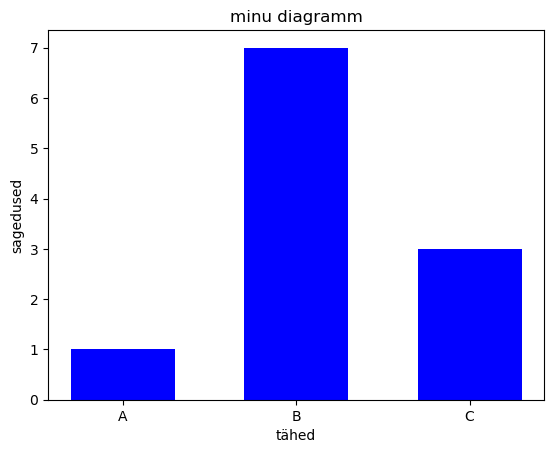

In [15]:
import matplotlib.pyplot as plt

# Andmed: tulpade nimed ja vastavad arvandmed
labels = ['A', 'B', 'C']
data   = [1, 7, 3]

# tulpade "koordinaadid"
# (ehk millises järjekorras tulbad pildile 
# paigutatakse)
y_pos = range(len(labels))
# tulpdiagrammi tegemine:
plt.bar(y_pos, data, color='blue', width=0.6)
# tulpade nimed:
plt.xticks(y_pos, labels)
# diagrammi ja selle telgede nimed:
plt.title('minu diagramm')
plt.xlabel('tähed')
plt.ylabel('sagedused')

# kuvame diagrammi:
plt.show()

Mille kohta veel tasub uurida: 
 * Funktsiooni bar [dokumentatsioon](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html);
 * X- ja Y-telje nimede vormistuse muutmine, nt [xticks](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html#matplotlib.pyplot.xticks) ja [selle võimalike parameetrite loend](https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text);
 * Pildi ja fondi suuruse [muutmine](https://matplotlib.org/stable/users/dflt_style_changes.html#figure-size-font-size-and-screen-dpi);

---